In [7]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load data

In [2]:
raw1 = pd.read_csv('climate_change_1.csv')
raw2 = pd.read_csv('climate_change_2.csv')
raw1.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


# Observation
## Draw plot

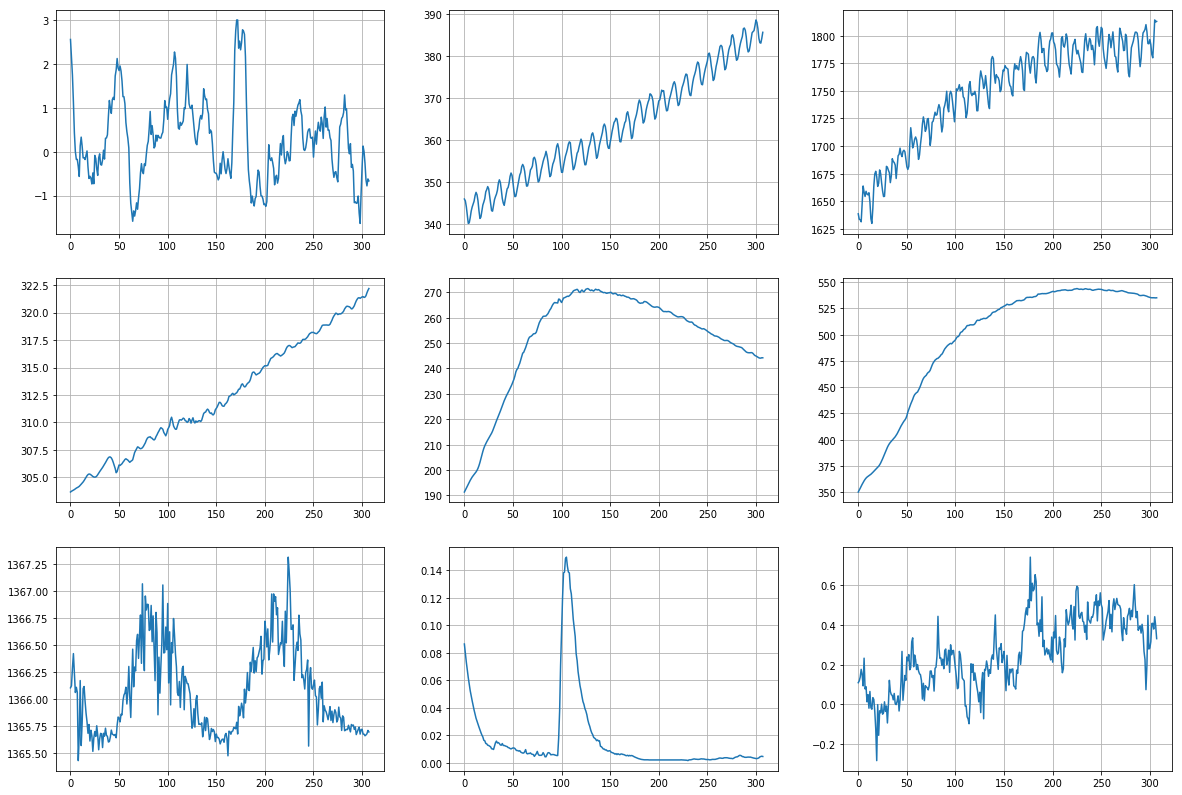

In [3]:
dataPart = raw1.drop(columns=['Year', "Month"])

fig=plt.figure(figsize=(20, 14))

columns = 3
rows = 3
for aColumn, i in zip(dataPart.columns, range(1, columns*rows +1)):
    img = dataPart[aColumn]
    fig.add_subplot(rows, columns, i)
    plt.grid()
    plt.plot(img)
plt.show()


## Correlation

In [4]:
(pd.DataFrame(np.corrcoef(dataPart.T), columns=dataPart.columns))

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
1,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
2,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
3,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
4,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
5,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
6,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
7,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069
8,0.135292,0.748505,0.699697,0.743242,0.380111,0.688944,0.182186,-0.392069,1.000000


# Split data

In [5]:
from sklearn.model_selection import train_test_split
temp = dataPart.Temp
X = dataPart.drop(columns='Temp')
y = np.array(temp)

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=284, random_state=42, shuffle = False)

# Linear regression

## hand made Linear regression

In [142]:
def myLinear(X_train, y_train, intercept = False):
    if intercept:
        X_train = sm.add_constant(X_train)
    coef_ = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    return(coef_)

myLinear(X_train, y_train, 1)

def myRTwo(y_true, y_pred):
    return(sum((y_pred - y_true.mean())**2)/sum((y_true - y_true.mean())**2))


## sklearn Linear regression

In [143]:
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
lnreg = LinearRegression(fit_intercept = True)
lnreg.fit(X_train, y_train)

print("lnreg.coef_:", lnreg.coef_)
print("lnreg.intercept:", lnreg.intercept_)
print("R_score of train dataset: ", myRTwo(y_train, lnreg.predict(X_train), ))
print("R_score of test dataset: ", myRTwo(y_test, lnreg.predict(X_test)))


# explained_variance_score(y_test, lnreg.predict(X_test))
myRTwo(y_test, lnreg.predict(X_test))

lnreg.coef_: [ 6.42053134e-02  6.45735927e-03  1.24041896e-04 -1.65280033e-02
 -6.63048889e-03  3.80810324e-03  9.31410835e-02 -1.53761324e+00]
lnreg.intercept: -124.59426040111464
R_score of train dataset:  0.7508932770523433
R_score of test dataset:  0.1837783533313636


0.22517701786318184

## significance of feature

In [106]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table 
X_train_ols = sm.add_constant(X_train)
y_train = y_train
model = sm.OLS(y_train, X_train_ols)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     103.6
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           1.94e-78
Time:                        17:22:52   Log-Likelihood:                 280.10
No. Observations:                 284   AIC:                            -542.2
Df Residuals:                     275   BIC:                            -509.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.5943     19.887     -6.265      0.000    -163.744     -85.445
MEI            0.0642      0.006      9.923      0.000       0.051       0.077
CO2            0.0065      0.002      2.826      0.005       0.002       0.011
CH4            0.0001      0.001      0.240      0.810      -0.001       0.001
N2O           -0.0165      0.009     -1.930      0.055      -0.033       0.000
CFC-11        -0.0066      0.002     -4.078      0.000      -0.010      -0.003
CFC-12         0.0038      0.001      3.757      0.000       0.002       0.006
TSI            0.0931      0.015      6.313      0.000       0.064       0.122
Aerosols      -1.5376      0.213     -7.210      0.000      -1.957      -1.118
==============================================================================
Omnibus:                        8.740   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.327
Skew:                           0.289   Prob(JB):                      0.00572
Kurtosis:                       3.733   Cond. No.                     8.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ridge

loss function of ridge: ||y - Xw||^2 + alpha * ||w||^2

## hand made ridge

In [107]:
regular_lambda = 1

def myRidge(X,y, regular_lambda):
    coef_ = np.linalg.inv(X.T.dot(X) + regular_lambda*np.identity(len(X.T))).dot(X.T).dot(y)
    return(coef_)

print(myRidge(X_train, y_train, 0.01))

[ 5.46159034e-02  6.34963828e-03  7.93457084e-05 -1.34724209e-02
 -5.83521694e-03  3.59044483e-03  1.25598515e-03 -1.26463937e+00]


Index(['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols'], dtype='object')

## sklearn ridge

In [144]:
from sklearn.linear_model import Ridge

rreg = Ridge(0.01, fit_intercept=True)
rreg.fit(X_train, y_train)

print("rreg.coef_:", rreg.coef_)

print("R_score of train dataset: ", myRTwo(y_train, rreg.predict(X_train)))
print("R_score of test dataset: ", myRTwo(y_test, rreg.predict(X_test)))

rreg.coef_: [ 6.33526479e-02  6.58059824e-03  1.33635948e-04 -1.67597448e-02
 -6.67017356e-03  3.81967407e-03  9.22953630e-02 -1.45866107e+00]
R_score of train dataset:  0.7461583440269607
R_score of test dataset:  0.22921989366184328


## hand made hyperparameter tuning (using cross validation)

here we choose 0.001 as our value of lambda

In [160]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5)
kf.get_n_splits(X_train)

print(kf)


# alpha = 0.01


for alpha in [1e-3, 1e-2, 1e-1, 1, 10, 100]:
    scores = []
    for train_index, test_index in kf.split(X_train):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_val_train, X_val = X_train.loc[train_index, :], X_train.loc[test_index, :]
        y_val_train, y_val = y_train[train_index], y_train[test_index]

        rreg = Ridge(alpha = alpha, fit_intercept=True).fit(X_val_train, y_val_train)
        r_square = mean_squared_error(y_val, rreg.predict(X_val))
       
        scores.append(r_square)
    print(alpha, np.mean(scores))
#     print(np.mean(scores))
   
# train_index

KFold(n_splits=5, random_state=None, shuffle=False)
0.001 0.024107854092164285
0.01 0.024789850569177187
0.1 0.03123733165634631
1 0.04170199006542597
10 0.04102779214900562
100 0.029170578213403586


## half hand made hyperparameter tuning (using cross validation)

here we choose 0.001 as our value of lambda

In [158]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [163]:
from sklearn.model_selection import cross_val_score

scorer = make_scorer(myRTwo)

alpha_scores = []
for alpha in [1e-3, 1e-2, 1e-1, 1, 10, 100]:
    rreg = Ridge(alpha = alpha, fit_intercept=True)
    loss = cross_val_score(rreg, X_train, y_train, scoring='neg_mean_squared_error')
    alpha_scores.append(np.mean(loss))

list(zip([1e-3, 1e-2, 1e-1, 1, 10, 100], alpha_scores))

[(0.001, -0.024107854092164285),
 (0.01, -0.024789850569177187),
 (0.1, -0.03123733165634631),
 (1, -0.04170199006542597),
 (10, -0.04102779214900562),
 (100, -0.029170578213403586)]

# Feature selection
## Sklearn Feature selection with lasso
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [281]:
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.01)
clf.fit(X_train, y_train)
selector = SelectFromModel(clf, prefit=True)

print(selector.get_support())


X_new = selector.transform(X_train)
print(X_train.shape)
print(X_new.shape)

[ True  True False False  True  True False False]
(284, 8)
(284, 4)


# use selected feature to train and test

In [164]:
param_grid = [
  {'alpha': [10, 1, 0.1, 0.01, 0.001], 'fit_intercept': [False]},
  {'alpha': [10, 1, 0.1, 0.01, 0.001], 'fit_intercept': [True]},
 ]

rreg = Ridge()
model = GridSearchCV(rreg, param_grid, cv=5,scoring = 'neg_mean_squared_error')
model.fit(X_new, y_train)

print(model.best_params_)
print("R_score of train dataset: ", model.score(X_new, y_train))

X_new_test = selector.transform(X_test)
print("R_score of test dataset: ", model.score(X_new_test, y_test))

NameError: name 'X_new' is not defined

In [283]:
lm=LinearRegression()

lm_min=np.min(X_train, axis=0)
lm_max=np.max(X_train,axis=0)
lm_train_x=(X_train - lm_min) / (lm_max - lm_min)
lm.fit(lm_train_x,y_train)

w_init=lm.coef_
b_init=lm.intercept_
print(w_init, b_init)

[ 0.29450977  0.28935427  0.02211171 -0.27724073 -0.53156629  0.7376296
  0.17604596 -0.22725924] -0.07698893822726105


In [286]:
class Linear_Regression_gradient():
    def __init__(self):
        pass
    def parameter_init(self, dim,w_init=None,b_init=None):
        self.W = w_init.reshape(dim,1)
        self.b = b_init
        
    def feature_scaling(self, X, train=False):    
        if train:
            self.min = np.min(X, axis=0)
            self.max = np.max(X, axis=0)
        return (X - self.min) / (self.max - self.min)
    
    def z_feature_scaling(self,X,train=False):
        if train:
            self.mean=np.mean(X,axis=0)
            self.std=np.std(X,axis=0)
        return((X-self.mean)/self.std)
        
    def predict(self, X): 
        return np.dot(X, self.W) + self.b
        
    def RMSELoss(self, X, Y):
        return np.sqrt(np.mean((Y - self.predict(X))** 2) )
#         , valid_X, valid_Y
    def train(self, X, Y, epochs=30000, lr=0.1 ,feature_scaling="feature_scaling"): 
        
        batch_size = X.shape[0]
        W_dim = X.shape[1]
        self.parameter_init(W_dim,w_init=w_init,b_init=b_init)
        
        if feature_scaling=="z_feature_scaling":
            X = self.z_feature_scaling(X, train=True)
        else:
            X = self.feature_scaling(X, train=True)

            
        lr_b = 0
        lr_W = np.zeros((W_dim, 1))


        for epoch in range(epochs):
            if not epoch%1000:
                print(epoch,self.RMSELoss(X,Y))
            # mse loss
            grad_b = -np.sum(Y - self.predict(X))/ batch_size
            grad_W = -np.dot(X.T, (Y - self.predict(X))) / batch_size
            
            # adagrad
            
            lr_b += grad_b ** 2
            lr_W += grad_W ** 2
            
            #update
            self.b = self.b - lr / np.sqrt(lr_b) * grad_b
            self.W = self.W - lr / np.sqrt(lr_W) * grad_W
#             self.b = self.b - lr * grad_b
#             self.W = self.W - lr * grad_W

In [287]:
lr=Linear_Regression_gradient()
lr.train(X_train,y_train.reshape(-1,1),epochs=50000,feature_scaling="feature_scaling")

0 0.09024652434195389
1000 0.09024652434195389
2000 0.09024652434195389
3000 0.09024652434195389
4000 0.09024652434195389
5000 0.09024652434195389
6000 0.09024652434195389
7000 0.09024652434195389
8000 0.09024652434195389
9000 0.09024652434195389
10000 0.09024652434195389
11000 0.09024652434195389
12000 0.09024652434195389
13000 0.09024652434195389
14000 0.09024652434195389
15000 0.09024652434195389
16000 0.09024652434195389
17000 0.09024652434195389
18000 0.09024652434195389
19000 0.09024652434195389
20000 0.09024652434195389
21000 0.09024652434195389
22000 0.09024652434195389
23000 0.09024652434195389
24000 0.09024652434195389
25000 0.09024652434195389
26000 0.09024652434195389
27000 0.09024652434195389
28000 0.09024652434195389
29000 0.09024652434195389
30000 0.09024652434195389
31000 0.09024652434195389
32000 0.09024652434195389
33000 0.09024652434195389
34000 0.09024652434195389
35000 0.09024652434195389
36000 0.09024652434195389
37000 0.09024652434195389
38000 0.09024652434195389